In [3]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-12-25 22:20:58--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   209MB/s    in 0.4s    

2023-12-25 22:20:58 (209 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4

In [4]:
# instalacja bazy danych ChEMBL, umożliwiającej pobieranie danych o bioaktywności z ChEMBL
%pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
     |████████████████████████████████| 670 kB 20.4 MB/s 
  Created wheel for easydict: filename=easydict-1.11-py3-none-any.whl size=6666 sha256=296f527bae59ba0059e37ddfd0cf7ac5927136163556e1828f84449d8babe38d
  Stored in directory: /root/.cache/pip/wheels/8c/d4/68/23bb57ca66f72f5c13f1f50aa980df9eb89839e46a675829c3
Successfully built easydict


In [5]:
# zaimportowanie biblioteki
import pandas as pd

In [6]:
from chembl_webresource_client.new_client import new_client

In [7]:
# wyszukiwanie celu
target=new_client.target
target_query=target.search('schizophrenia')
targets=pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P43005', 'xref_name': None, 'xre...",Homo sapiens,Excitatory amino acid transporter 3,9.0,False,CHEMBL2721,"[{'accession': 'P43005', 'component_descriptio...",SINGLE PROTEIN,9606


In [8]:
# wybór docelowego białka- zmienna selected_target
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2721'

In [9]:
# uzyskanie danych IC50 białka docelowego
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [10]:
# utworzenie tabeli danych z przefiltrowanych danych i ogólnych informacji
df = pd.DataFrame.from_dict(res)

In [11]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32735,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
1,None,None,33966,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
2,None,None,44798,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
3,None,None,52404,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
4,None,None,54936,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900186,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,4.73
351,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900187,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,5.05
352,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900188,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,4.52
353,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900189,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,5.12


In [12]:
# zapis tabeli do pliku csv
df.to_csv('schizophrenia125_bioactivity_data.csv', index=False)


In [13]:
# poprawa jakości danych wyświetlanych w tabeli i wywołanie nowej tabeli
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32735,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
1,None,None,33966,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
2,None,None,44798,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
3,None,None,52404,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
4,None,None,54936,[],CHEMBL680701,Binding affinity for Excitatory amino acid tra...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,IC50,uM,UO_0000065,None,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900186,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,4.73
351,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900187,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,5.05
352,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900188,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,4.52
353,"{'action_type': 'INHIBITOR', 'description': 'N...",None,22900189,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4731538,Inhibition of human EAAT3 transfected in HEK29...,B,None,None,BAO_0000190,...,Homo sapiens,Excitatory amino acid transporter 3,9606,None,None,pIC50,None,UO_0000065,None,5.12


In [14]:
# oznaczenie klas bioaktywności
bioactivity_threshold = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

utworzenie formuł opisujących molekuły (identyfikator chembl, wzór kanoniczny
smile, wartość standardowa, klasa bioaktywności)

In [15]:
mol_cid=[]
for i in df2.molecule_chembl_id:
    mol_cid.append(i)

In [16]:
canonical_smiles=[]
for i in df2.canonical_smiles:
    canonical_smiles.append(i)

In [17]:
standard_value=[]
for i in df2.standard_value:
    standard_value.append(i)

In [19]:
# przekształcenie listy klas bioaktywności na serię danych o nazwie bioactivity_class
bioactivity_class = pd.Series(bioactivity_threshold, name='bioactivity_class')

In [20]:
# połączenie danych w tabelę
data_tuples=list(zip(mol_cid, canonical_smiles, standard_value, bioactivity_class))
df3=pd.DataFrame(data_tuples, columns=['molecules_chembl_id', 'canonical_smiles', 'standard_value','bioactivity_class'])

In [21]:
df3

,molecules_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL320290,NC(Cc1ccnn1O)C(=O)O,1000000.0,inactive
1,CHEMBL321164,NC(Cc1cnnn1O)C(=O)O,1000000.0,inactive
2,CHEMBL104208,Cc1nnn(O)c1CC(N)C(=O)O,1000000.0,inactive
3,CHEMBL13378,Cc1onc(O)c1CC(N)C(=O)O,1000000.0,inactive
4,CHEMBL317234,NC(Cc1conc1O)C(=O)O,1000000.0,inactive
...,...,...,...,...
343,CHEMBL4798659,Cc1ccc(S(=O)(=O)n2ccc3ccc(CO[C@H](C(=O)O)[C@H]...,18620.87,inactive
344,CHEMBL4759043,Cc1ccc(S(=O)(=O)n2cc(-c3ccsc3)c3ccc(CO[C@H](C(...,8912.51,intermediate
345,CHEMBL4743706,Cc1ccc(S(=O)(=O)n2cc(-c3ccccc3)c3ccc(CO[C@H](C...,30199.52,inactive
346,CHEMBL4790691,Cc1ccc(S(=O)(=O)n2cc(-c3ccc(C(F)(F)F)cc3)c3ccc...,7585.78,intermediate


In [22]:
#zapisanie tabeli do pliku csv

df3.to_csv('schizophrenia225_bioactivity_data_curated.csv', index=False)


In [23]:
# instalacja biblioteki RDKit, zaimportowanie biblioteki numpy
%pip install rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 1.5 MB/s 


In [24]:
#zdefiniowanie deskryptorów Lipinskiego
def lipinski (smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [25]:
df_lipinski = lipinski(df3.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,171.156,-0.92520,3.0,5.0
1,172.144,-1.53020,3.0,6.0
2,186.171,-1.22178,3.0,6.0
3,186.167,-0.35698,3.0,5.0
4,172.140,-0.66540,3.0,5.0
...,...,...,...,...
343,468.915,1.99022,3.0,7.0
344,628.603,3.93022,4.0,9.0
345,622.574,3.86872,4.0,8.0
346,690.571,4.88752,4.0,8.0


In [26]:
#połączenie tabel
df4 = pd.concat([df3,df_lipinski], axis=1)

In [27]:
df4

,molecules_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL320290,NC(Cc1ccnn1O)C(=O)O,1000000.0,inactive,171.156,-0.92520,3.0,5.0
1,CHEMBL321164,NC(Cc1cnnn1O)C(=O)O,1000000.0,inactive,172.144,-1.53020,3.0,6.0
2,CHEMBL104208,Cc1nnn(O)c1CC(N)C(=O)O,1000000.0,inactive,186.171,-1.22178,3.0,6.0
3,CHEMBL13378,Cc1onc(O)c1CC(N)C(=O)O,1000000.0,inactive,186.167,-0.35698,3.0,5.0
4,CHEMBL317234,NC(Cc1conc1O)C(=O)O,1000000.0,inactive,172.140,-0.66540,3.0,5.0
...,...,...,...,...,...,...,...,...
343,CHEMBL4798659,Cc1ccc(S(=O)(=O)n2ccc3ccc(CO[C@H](C(=O)O)[C@H]...,18620.87,inactive,468.915,1.99022,3.0,7.0
344,CHEMBL4759043,Cc1ccc(S(=O)(=O)n2cc(-c3ccsc3)c3ccc(CO[C@H](C(...,8912.51,intermediate,628.603,3.93022,4.0,9.0
345,CHEMBL4743706,Cc1ccc(S(=O)(=O)n2cc(-c3ccccc3)c3ccc(CO[C@H](C...,30199.52,inactive,622.574,3.86872,4.0,8.0
346,CHEMBL4790691,Cc1ccc(S(=O)(=O)n2cc(-c3ccc(C(F)(F)F)cc3)c3ccc...,7585.78,intermediate,690.571,4.88752,4.0,8.0


In [28]:
# sprawdzenie typów danych w tabeli
df4.dtypes

molecules_chembl_id     object
canonical_smiles        object
standard_value          object
bioactivity_class       object
MW                     float64
LogP                   float64
NumHDonors             float64
NumHAcceptors          float64
dtype: object

In [29]:
# przekształcenie typu wartości standardowej
df4['standard_value'] = df4['standard_value'].astype(float)

In [30]:
df4

,molecules_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL320290,NC(Cc1ccnn1O)C(=O)O,1000000.00,inactive,171.156,-0.92520,3.0,5.0
1,CHEMBL321164,NC(Cc1cnnn1O)C(=O)O,1000000.00,inactive,172.144,-1.53020,3.0,6.0
2,CHEMBL104208,Cc1nnn(O)c1CC(N)C(=O)O,1000000.00,inactive,186.171,-1.22178,3.0,6.0
3,CHEMBL13378,Cc1onc(O)c1CC(N)C(=O)O,1000000.00,inactive,186.167,-0.35698,3.0,5.0
4,CHEMBL317234,NC(Cc1conc1O)C(=O)O,1000000.00,inactive,172.140,-0.66540,3.0,5.0
...,...,...,...,...,...,...,...,...
343,CHEMBL4798659,Cc1ccc(S(=O)(=O)n2ccc3ccc(CO[C@H](C(=O)O)[C@H]...,18620.87,inactive,468.915,1.99022,3.0,7.0
344,CHEMBL4759043,Cc1ccc(S(=O)(=O)n2cc(-c3ccsc3)c3ccc(CO[C@H](C(...,8912.51,intermediate,628.603,3.93022,4.0,9.0
345,CHEMBL4743706,Cc1ccc(S(=O)(=O)n2cc(-c3ccccc3)c3ccc(CO[C@H](C...,30199.52,inactive,622.574,3.86872,4.0,8.0
346,CHEMBL4790691,Cc1ccc(S(=O)(=O)n2cc(-c3ccc(C(F)(F)F)cc3)c3ccc...,7585.78,intermediate,690.571,4.88752,4.0,8.0


In [31]:
# parametry statystyczne dotyczące wartości standardowej
df4.standard_value.describe()

count    3.480000e+02
mean     3.316136e+05
std      6.481645e+05
min      5.000000e+01
25%      5.075000e+03
50%      1.000000e+05
75%      3.000000e+05
max      3.162278e+06
Name: standard_value, dtype: float64

In [32]:
# utworzenie znormalizowanej wartości standardowej
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis= 1)

    return x

In [33]:
df_norm = norm_value(df4)
df_norm

,molecules_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL320290,NC(Cc1ccnn1O)C(=O)O,inactive,171.156,-0.92520,3.0,5.0,1000000.00
1,CHEMBL321164,NC(Cc1cnnn1O)C(=O)O,inactive,172.144,-1.53020,3.0,6.0,1000000.00
2,CHEMBL104208,Cc1nnn(O)c1CC(N)C(=O)O,inactive,186.171,-1.22178,3.0,6.0,1000000.00
3,CHEMBL13378,Cc1onc(O)c1CC(N)C(=O)O,inactive,186.167,-0.35698,3.0,5.0,1000000.00
4,CHEMBL317234,NC(Cc1conc1O)C(=O)O,inactive,172.140,-0.66540,3.0,5.0,1000000.00
...,...,...,...,...,...,...,...,...
343,CHEMBL4798659,Cc1ccc(S(=O)(=O)n2ccc3ccc(CO[C@H](C(=O)O)[C@H]...,inactive,468.915,1.99022,3.0,7.0,18620.87
344,CHEMBL4759043,Cc1ccc(S(=O)(=O)n2cc(-c3ccsc3)c3ccc(CO[C@H](C(...,intermediate,628.603,3.93022,4.0,9.0,8912.51
345,CHEMBL4743706,Cc1ccc(S(=O)(=O)n2cc(-c3ccccc3)c3ccc(CO[C@H](C...,inactive,622.574,3.86872,4.0,8.0,30199.52
346,CHEMBL4790691,Cc1ccc(S(=O)(=O)n2cc(-c3ccc(C(F)(F)F)cc3)c3ccc...,intermediate,690.571,4.88752,4.0,8.0,7585.78


In [34]:
# parametry statystyczne dotyczące znormalizowanej wartości standardowej

df_norm.standard_value_norm.describe()

count    3.480000e+02
mean     3.316136e+05
std      6.481645e+05
min      5.000000e+01
25%      5.075000e+03
50%      1.000000e+05
75%      3.000000e+05
max      3.162278e+06
Name: standard_value_norm, dtype: float64

In [35]:
# zdefiniowanie pIC50
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis= 1)

    return x

In [36]:
# dodanie kolumny pIC50 d0 tabeli
df5 = pIC50(df_norm)
df5

,molecules_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL320290,NC(Cc1ccnn1O)C(=O)O,inactive,171.156,-0.92520,3.0,5.0,3.00000
1,CHEMBL321164,NC(Cc1cnnn1O)C(=O)O,inactive,172.144,-1.53020,3.0,6.0,3.00000
2,CHEMBL104208,Cc1nnn(O)c1CC(N)C(=O)O,inactive,186.171,-1.22178,3.0,6.0,3.00000
3,CHEMBL13378,Cc1onc(O)c1CC(N)C(=O)O,inactive,186.167,-0.35698,3.0,5.0,3.00000
4,CHEMBL317234,NC(Cc1conc1O)C(=O)O,inactive,172.140,-0.66540,3.0,5.0,3.00000
...,...,...,...,...,...,...,...,...
343,CHEMBL4798659,Cc1ccc(S(=O)(=O)n2ccc3ccc(CO[C@H](C(=O)O)[C@H]...,inactive,468.915,1.99022,3.0,7.0,4.73000
344,CHEMBL4759043,Cc1ccc(S(=O)(=O)n2cc(-c3ccsc3)c3ccc(CO[C@H](C(...,intermediate,628.603,3.93022,4.0,9.0,5.05000
345,CHEMBL4743706,Cc1ccc(S(=O)(=O)n2cc(-c3ccccc3)c3ccc(CO[C@H](C...,inactive,622.574,3.86872,4.0,8.0,4.52000
346,CHEMBL4790691,Cc1ccc(S(=O)(=O)n2cc(-c3ccc(C(F)(F)F)cc3)c3ccc...,intermediate,690.571,4.88752,4.0,8.0,5.12000


In [37]:
# parametry statystyczne dotyczące pIC50
df5.pIC50.describe()


count    348.000000
mean       4.360686
std        1.164380
min        2.500000
25%        3.522879
50%        4.000000
75%        5.294580
max        7.301030
Name: pIC50, dtype: float64

In [38]:
# zapisanie tabeli do pliku
df5.to_csv('schizophrenia2512_bioactivity_data_3class_pIC50.csv')

In [39]:
# usunięcie z tabeli danych dotyczących klasy pośredniej
df_2class = df5[df5.bioactivity_class!= 'intermediate']
df_2class

,molecules_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL320290,NC(Cc1ccnn1O)C(=O)O,inactive,171.156,-0.92520,3.0,5.0,3.000000
1,CHEMBL321164,NC(Cc1cnnn1O)C(=O)O,inactive,172.144,-1.53020,3.0,6.0,3.000000
2,CHEMBL104208,Cc1nnn(O)c1CC(N)C(=O)O,inactive,186.171,-1.22178,3.0,6.0,3.000000
3,CHEMBL13378,Cc1onc(O)c1CC(N)C(=O)O,inactive,186.167,-0.35698,3.0,5.0,3.000000
4,CHEMBL317234,NC(Cc1conc1O)C(=O)O,inactive,172.140,-0.66540,3.0,5.0,3.000000
...,...,...,...,...,...,...,...,...
339,CHEMBL4743706,Cc1ccc(S(=O)(=O)n2cc(-c3ccccc3)c3ccc(CO[C@H](C...,inactive,622.574,3.86872,4.0,8.0,4.522879
341,CHEMBL575060,N[C@@H](CCC(=O)O)C(=O)O,inactive,147.130,-0.73690,3.0,3.0,4.300000
343,CHEMBL4798659,Cc1ccc(S(=O)(=O)n2ccc3ccc(CO[C@H](C(=O)O)[C@H]...,inactive,468.915,1.99022,3.0,7.0,4.730000
345,CHEMBL4743706,Cc1ccc(S(=O)(=O)n2cc(-c3ccccc3)c3ccc(CO[C@H](C...,inactive,622.574,3.86872,4.0,8.0,4.520000


In [40]:
# zapisanie danych bez klasy pośredniej do pliku csv
df_2class.to_csv('schizophrenia2512_bioactivity_data_2class_pIC50.csv')

# Analiza danych na podstawie deskryptorów Lipinski

In [42]:
# zaimportowanie seaborn i matplotlib
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

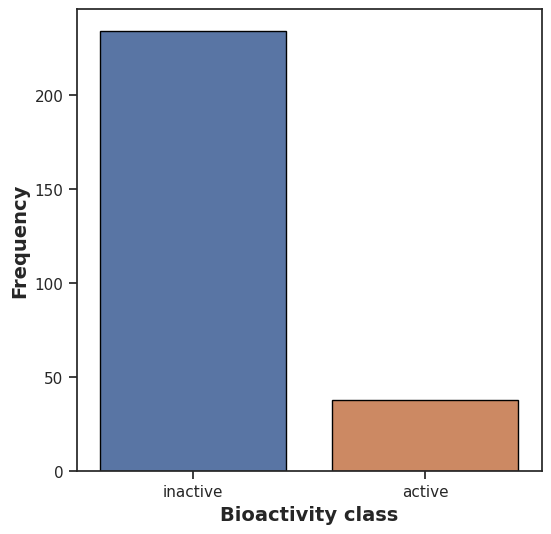

In [44]:
# utworzenie wykresu częstotliwości występowania klasy aktywnej i nieaktywnej
plt.figure(figsize=(6, 6))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot2512_bioactivity_class.png')

In [45]:
#sprawdzenie liczebności klas
bioactivity_class_counts=df_2class['bioactivity_class']\
.value_counts()\
.sort_index()
print(bioactivity_class_counts)

active       38
inactive    234
Name: bioactivity_class, dtype: int64


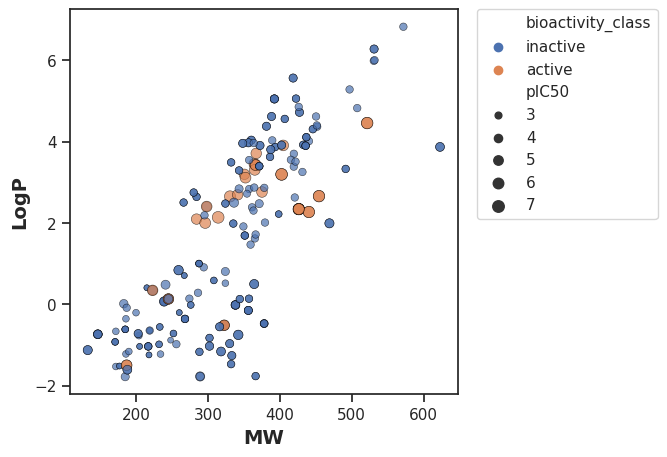

In [46]:
# utworzenie wykresu zależności MW i LogP
plt.figure(figsize=(5, 5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot2512_MW_LogP.png',bbox_inches='tight')

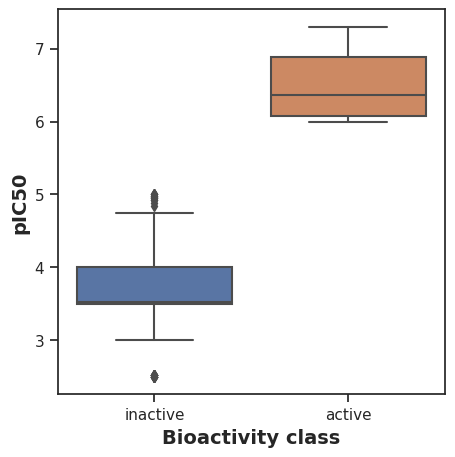

In [47]:
# utworzenie wykresu rozkładu wartości pIC50 z podziałem na klasy
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.savefig('plot2512_pIC50.png')


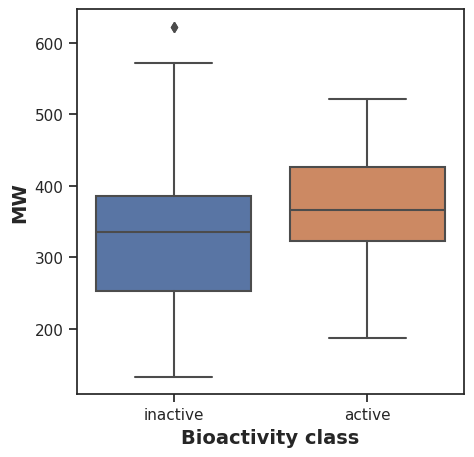

In [48]:
# utworzenie wykresu rozkładu wartości MW z podziałem na klasy
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.savefig('plot2512_MW.png')

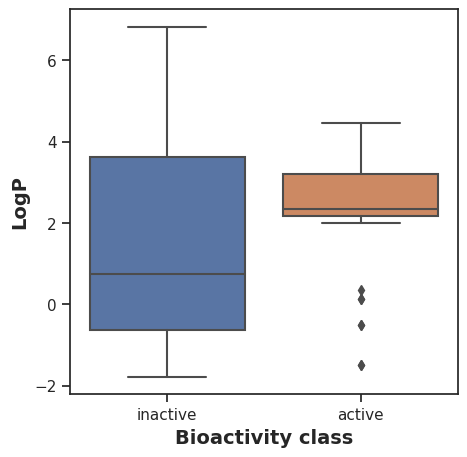

In [49]:
# utworzenie wykresu rozkładu wartości LogP z podziałem na klasy
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('plot2512_LogP.png')

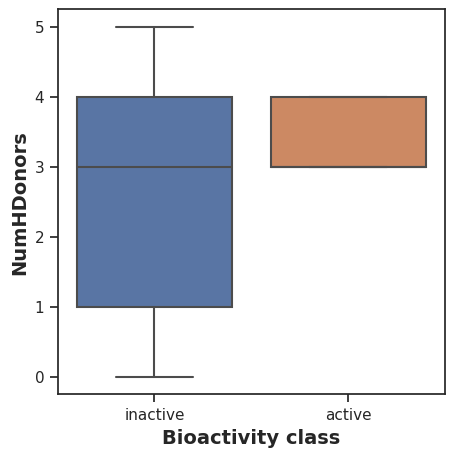

In [50]:
# utworzenie wykresu rozkładu liczby donorów wodorowych z podziałem na klasy
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('plot2512_NumHDonors.pdf')

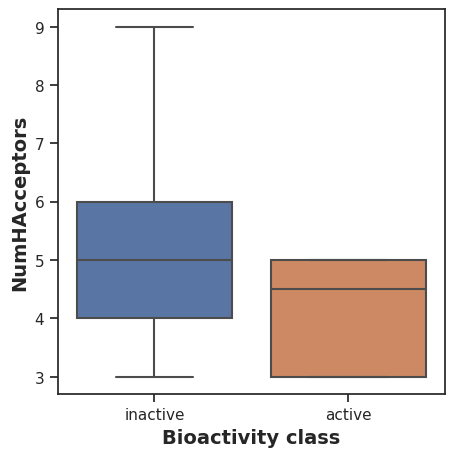

In [51]:
# utworzenie wykresu rozkładu liczby akceptorów wodorowych z podziałem na klasy
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('plot2512_NumHAcceptors.png')

In [52]:
#pobranie plików niezbędnych do utworzenia deskryptorów PaDELPy
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-12-25 22:45:47--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-12-25 22:45:47--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.08s   

2023-12-25 22:45:47 (299 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-12-25 22:45:47--  https://github

In [53]:
! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [55]:
# wybór danych potrzebnych do utworzenia deskryptorów
selection = ['canonical_smiles','molecules_chembl_id']
df5_selection = df5[selection]
df5_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [56]:
! cat molecule.smi | head -5


NC(Cc1ccnn1O)C(=O)O	CHEMBL320290
NC(Cc1cnnn1O)C(=O)O	CHEMBL321164
Cc1nnn(O)c1CC(N)C(=O)O	CHEMBL104208
Cc1onc(O)c1CC(N)C(=O)O	CHEMBL13378
NC(Cc1conc1O)C(=O)O	CHEMBL317234


In [57]:
! cat molecule.smi | wc -l


348


In [58]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [59]:
! bash padel.sh


Processing CHEMBL320290 in molecule.smi (1/348). 
Processing CHEMBL321164 in molecule.smi (2/348). 
Processing CHEMBL13378 in molecule.smi (4/348). Average speed: 0.93 s/mol.
Processing CHEMBL104208 in molecule.smi (3/348). Average speed: 1.87 s/mol.
Processing CHEMBL317234 in molecule.smi (5/348). Average speed: 0.72 s/mol.
Processing CHEMBL104197 in molecule.smi (6/348). Average speed: 0.54 s/mol.
Processing CHEMBL104065 in molecule.smi (7/348). Average speed: 0.47 s/mol.
Processing CHEMBL102612 in molecule.smi (8/348). Average speed: 0.40 s/mol.
Processing CHEMBL107160 in molecule.smi (9/348). Average speed: 0.38 s/mol.
Processing CHEMBL1790042 in molecule.smi (12/348). Average speed: 0.33 s/mol.
Processing CHEMBL323289 in molecule.smi (10/348). Average speed: 0.34 s/mol.
Processing CHEMBL104039 in molecule.smi (11/348). Average speed: 0.33 s/mol.
Processing CHEMBL1790043 in molecule.smi (13/348). Average speed: 0.30 s/mol.
Processing CHEMBL475341 in molecule.smi (14/348). Average s

Przygotowanie macierzy danych X i Y

In [60]:
# odczyt danych
df5_X = pd.read_csv('descriptors_output.csv')
df5_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL320290,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL321164,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL104208,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL13378,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL104197,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,CHEMBL4798659,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,CHEMBL4759043,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,CHEMBL4743706,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,CHEMBL458273,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#usunięcie niepotrzebnej kolumny
df5_X = df5_X.drop(columns=['Name'])
df5_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
344,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
345,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
346,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:

df5_Y = df5['pIC50']
df5_Y

0      3.00000
1      3.00000
2      3.00000
3      3.00000
4      3.00000
        ...   
343    4.73000
344    5.05000
345    4.52000
346    5.12000
347    6.09691
Name: pIC50, Length: 348, dtype: float64

In [63]:
# połączenie danych X i Y
dataset5 = pd.concat([df5_X,df5_Y], axis=1)
dataset5

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.73000
344,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.05000
345,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.52000
346,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.12000


In [64]:
#zapisanie zestawu danych do pliku csv
dataset5.to_csv('schizophrenia2512_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [65]:
# odczyt danych w formie tabeli
df6=pd.read_csv('schizophrenia2512_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.73000
344,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.05000
345,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.52000
346,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.12000


In [66]:
#przygotowanie danych wejściowych (usunięcie kolumny zawierającej pIC50)
X = df6.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
344,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
345,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
346,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# przygotowanie danych wyjściowych
Y = df6.pIC50
Y

0      3.00000
1      3.00000
2      3.00000
3      3.00000
4      3.00000
        ...   
343    4.73000
344    5.05000
345    4.52000
346    5.12000
347    6.09691
Name: pIC50, Length: 348, dtype: float64

In [68]:
# wymiary X
X.shape

(348, 881)

In [69]:
# wymiary Y
Y.shape

(348,)

In [70]:
# usunięcie danych o małej zmienności
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [71]:
X.shape

(348, 151)

In [72]:
# podział danych na zestaw treningowy i testowy
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [73]:
# wymiary zestawu treningowego
X_train.shape, Y_train.shape

((278, 151), (278,))

In [74]:
# wymiary zestawu testowego
X_test.shape, Y_test.shape

((70, 151), (70,))

In [75]:
# zaimportowanie bibliotek tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint


In [76]:
# zdefiniowanie modelu uczenia maszynowego
def neural_network_model(hidden1, hidden2):
    model = Sequential()

    model.add(Dense(hidden1, activation="relu", name="layer1"))

    model.add(Dense(hidden2, activation="relu", name="layer2"))

    model.add(Dense(1, activation="linear", name="layer3"))


    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

In [77]:
# parametry modelu
batch_sizes = [16, 26, 30, 32, 48, 64]
nb_epoch = 50
layer1_size = 64
layer2_size = 32

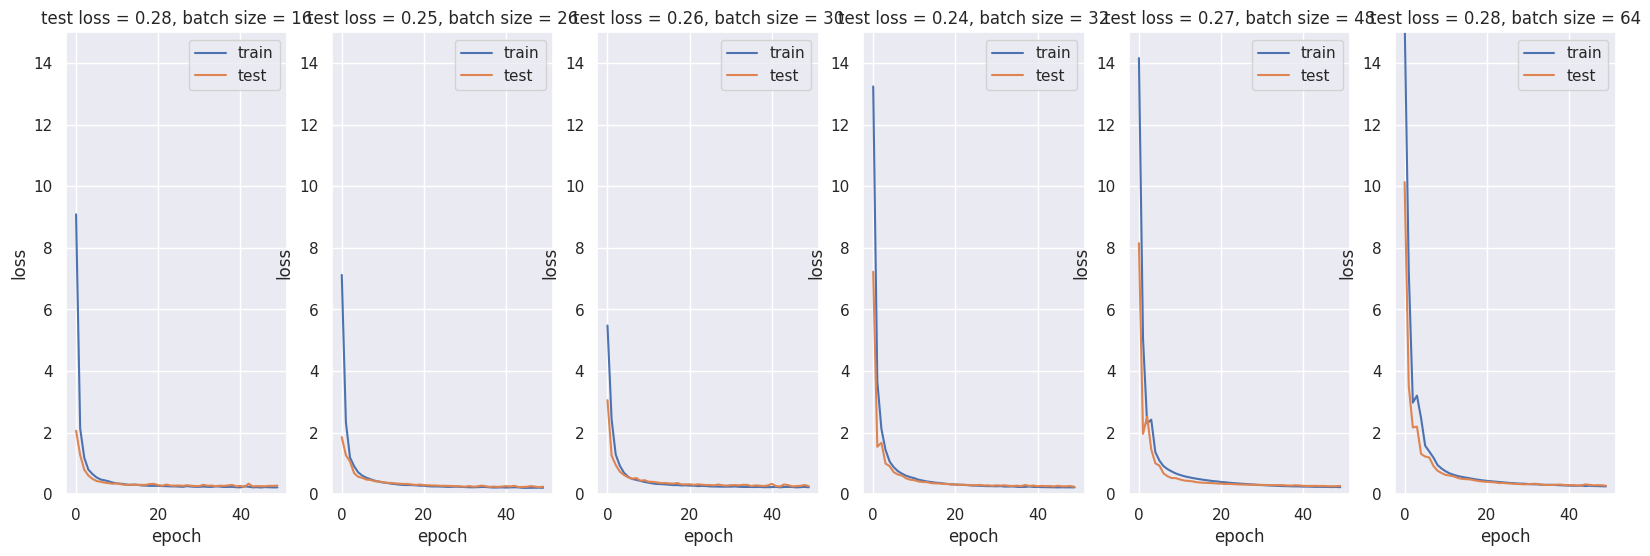

<Figure size 640x480 with 0 Axes>

In [78]:
# wykres pozwalający wybrać parametry o najlepszej wydajności
fig = plt.figure(figsize=(20, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)
    history = model.fit(
        np.array(list((X_train))).astype(float),
        Y_train.values,
        batch_size=batch,
        validation_data=(np.array(list((X_test))).astype(float), Y_test.values),
        verbose=0,
        epochs=nb_epoch,)
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title( f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}")
plt.show()
plt.savefig('plot2512.png')

In [79]:
from pathlib import Path
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [82]:
# zapis modelu treningowego
filepath = DATA / "best_weights.hdf5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,)
callbacks_list = [checkpoint]
# stworzenie/dopasowanie modelu
model.fit(
    np.array(list((X_train))).astype(float),
    Y_train.values,
    epochs=nb_epoch,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=0,)

In [83]:
# przewidywanie wartości pIC50 (Y) na podstawie X_test
Y_pred = model.predict(np.array(list((X_test))))


3/3 [==============================] - 0s 4ms/step


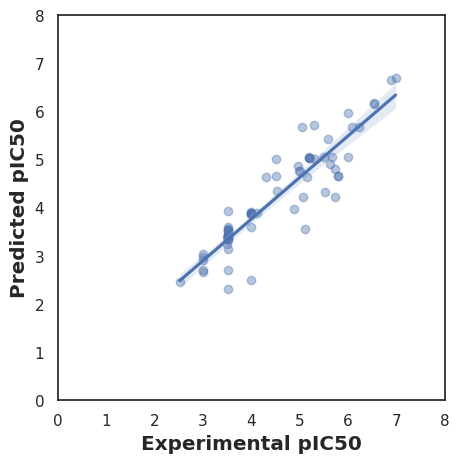

In [85]:
# utworzenie wykresu przedstawiającego różnicę między rzeczywistym pIC50 a eksperymentalnym
sns.set(color_codes=True)
sns.set_style("white")

ax= sns.regplot(x=Y_test, y= Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.figure.set_size_inches(5, 5)
plt.savefig('plot2512_final.pdf')

In [86]:
# ewaluacja modelu
print(model.evaluate(X_train, Y_train))
print(model.evaluate(X_test, Y_test))




9/9 [==============================] - 0s 3ms/step - loss: 0.1900 - mse: 0.1900 - mae: 0.2972
[0.1899813562631607, 0.1899813562631607, 0.29723283648490906]
3/3 [==============================] - 0s 8ms/step - loss: 0.2985 - mse: 0.2985 - mae: 0.3804
[0.2985323369503021, 0.2985323369503021, 0.38036400079727173]
